# Tarea - Realizar graficas donde se comparen diferentes mediciones para tratar de identificar algun patron

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
import emcee
import pandas as pd
import corner
from pandasql import sqldf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib import pyplot

In [2]:
data = pd.read_csv(f'/home/luiscantero/anadat/Archivos/Semana13/result2')
data.keys()

/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (69,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['decals_id', 'ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'mjd_min',
       'mjd_max', 'htm9',
       ...
       'nobs_r', 'nobs_z', 'anymask_g', 'anymask_r', 'anymask_z', 'allmask_g',
       'allmask_r', 'allmask_z', 'brickname', 'type'],
      dtype='object', length=115)

In [3]:
data

,decals_id,ra,dec,elon,elat,glon,glat,mjd_min,mjd_max,htm9,...,nobs_r,nobs_z,anymask_g,anymask_r,anymask_z,allmask_g,allmask_r,allmask_z,brickname,type
0,5497595108656072,286.578976,44.694369,300.428869,66.391005,75.298153,16.240068,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
1,5497595108656071,286.581590,44.694554,300.433448,66.390655,75.299066,16.238419,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
2,5497595108656189,286.592264,44.700596,300.455895,66.394298,75.307890,16.233697,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
3,5497595108656176,286.588875,44.699958,300.449675,66.394369,75.306322,16.235683,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
4,5497595108656067,286.586210,44.700882,300.445793,66.395793,75.306463,16.237786,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
5,5497595108656191,286.593603,44.703107,300.459954,66.396436,75.310686,16.233771,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,REX
6,5497595108656203,286.579200,44.701010,300.433950,66.397328,75.304615,16.242444,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
7,5497595108656270,286.584390,44.706226,300.446478,66.401283,75.311099,16.241013,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
8,5497595108656114,286.574717,44.696365,300.423030,66.393776,75.298878,16.243627,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
9,5497595108656113,286.573210,44.696454,300.420528,66.394165,75.298540,16.244651,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF


In [4]:
tipos = np.array(['PSF', 'REX', 'DEV', 'EXP', 'COMP'])
tipos

array(['PSF', 'REX', 'DEV', 'EXP', 'COMP'], dtype='<U4')

In [5]:
# FUNCION PARA SEPARAR UNA COLUMNA EN ESPECIFICO DE ACUERDO A LOS 5 TIPOS DE OBJETOS
def separa(columna):
    psf = []
    rex = []
    dev = []
    exp = []
    comp = []
    for i in range (0, len(tipos)):
        for j in range (0, len(columna)):
            if columna[j] != 'nan':
                if data.type[j] == 'PSF':
                    psf.append(columna[j])
                if data.type[j] == 'REX':
                    rex.append(columna[j])
                if data.type[j] == 'DEV':
                    dev.append(columna[j])    
                if data.type[j] == 'EXP':
                    exp.append(columna[j])
                if data.type[j] == 'COMP':
                    comp.append(columna[j])    
    return np.array([psf,rex,dev,exp,comp])

# FUNCION PARA FILTRAR LOS DATOS DE DOS COLUMNAS A LA VEZ ENTRE LIMITES QUE SE ESPECIFICAN

def separa2(columna1, li, ls, columna2, li2, ls2):
    hola = []
    hola2 = []
    for i in range (0, len(columna1)):
        if columna1[i]> li:
            if columna1[i]< ls:
                if columna2[i]>li2:
                    if columna2[i]<ls2:
                        hola.append(columna1[i])
                        hola2.append(columna2[i])
    return hola, hola2        

# FUNCION PARA FILTRAR LOS DATOS DE TRES COLUMNAS A LA VEZ ENTRE LIMITES QUE SE ESPECIFICAN

def separa3(columna1, li, ls, columna2, li2, ls2, columna3, li3, ls3):
    hola = []
    hola2 = []
    hola3 = []
    
    for i in range (0, len(columna1)):
        if columna1[i]>= li:
            if columna1[i]<= ls:
                if columna2[i]>=li2:
                    if columna2[i]<=ls2:
                        if columna3[i]>=li3:
                            if columna3[i]<=ls3:
                                hola.append(columna1[i])
                                hola2.append(columna2[i])
                                hola3.append(columna3[i])
    return hola, hola2, hola3        

Convertimos los los angulos de ascension recta y declinacion a radianes

In [6]:
rarad = data.ra*3.141592653/180

In [7]:
decrad = data.dec*3.141592653/180

Generamos aleatorios para Ra y Dec

In [8]:
randra22 = np.random.uniform(0,2*np.pi,10000)

In [9]:
randdec22 = np.random.uniform(0,np.pi,10000)

In [10]:
randtotal = 100000

In [11]:
randra = np.random.uniform(min(rarad),max(rarad),randtotal)

In [12]:
randdec = np.random.uniform(min(decrad),max(decrad),randtotal)

In [13]:
randra3 = np.random.uniform(min(rarad),max(rarad),randtotal)

In [14]:
randdec3 = np.random.uniform(min(decrad),max(decrad),randtotal)

Graficamos los datos

Text(0,0.5,'Declinacion, Dec (Radianes)')

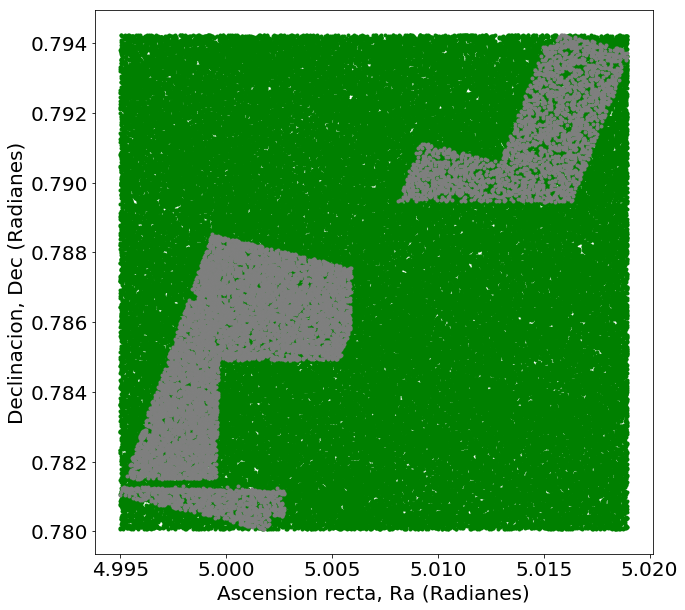

In [15]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size':20})

plt.plot(randra, randdec, '.', color = 'g')
plt.plot(rarad, decrad, '.', color = 'tab:gray')
#plt.xlim(4.994,5.02)
#plt.ylim(0.779,0.795)

plt.xlabel("Ascension recta, Ra (Radianes)") 
plt.ylabel("Declinacion, Dec (Radianes)")

Convertimos las coordenadas polares a coordenadas cartesianas

In [16]:
x = np.cos(rarad)*np.sin(decrad)
y = np.sin(rarad)*np.sin(decrad)
z = np.cos(decrad)

In [17]:
ranx22 = np.cos(randra22)*np.sin(randdec22)
rany22 = np.sin(randra22)*np.sin(randdec22)
ranz22 = np.cos(randdec22)

In [18]:
ranx = np.cos(randra)*np.sin(randdec)
rany = np.sin(randra)*np.sin(randdec)
ranz = np.cos(randdec)

In [19]:
ranx3 = np.cos(randra3)*np.sin(randdec3)
rany3 = np.sin(randra3)*np.sin(randdec3)
ranz3 = np.cos(randdec3)

Graficamos estos datos

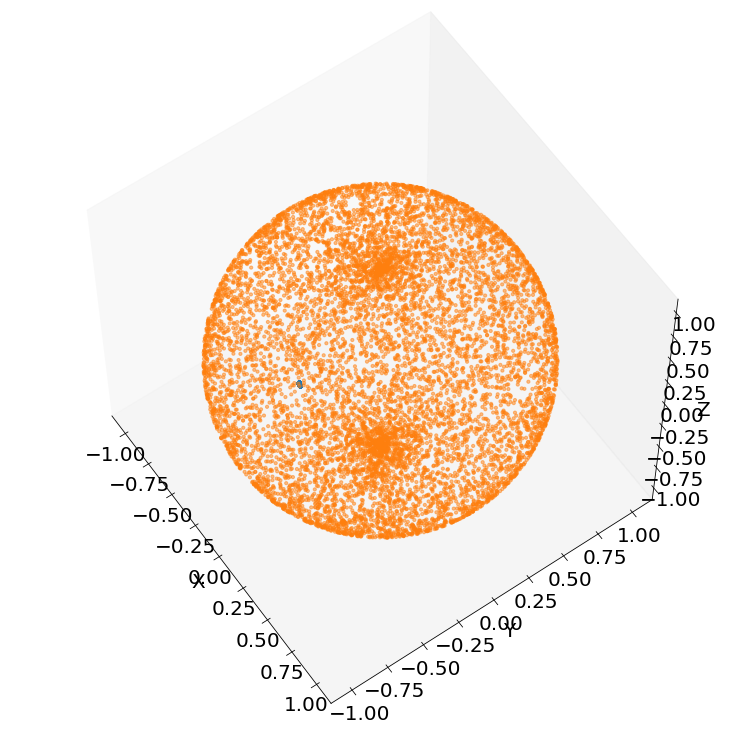

In [33]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size':20})
ax = Axes3D(fig)
ax.grid(False)
ax.scatter(x, y, z, s=10, alpha = 0.5)
ax.scatter(ranx22, rany22, ranz22, s=10, alpha = 0.5)


ax.set_xlabel("X") 
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(60, 325)

Graficamos solo los datos de la region donde se trabaja

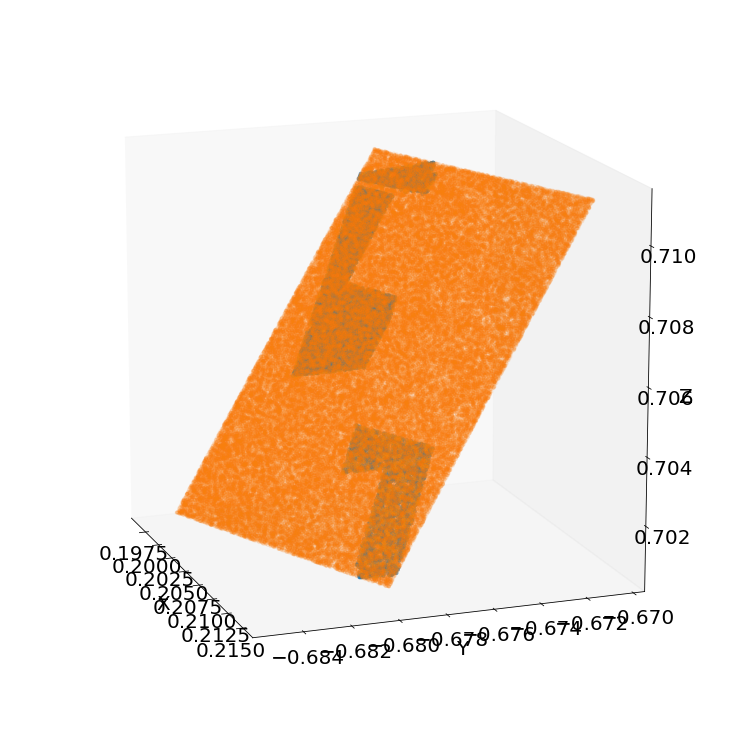

In [21]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams.update({'font.size':20})

ax = Axes3D(fig)
ax.grid(False)
ax.scatter(x, y, z, s=10, alpha = 0.5)
ax.scatter(ranx, rany, ranz, s=10, alpha = 0.1)

ax.set_xlabel("X") 
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(15, 340)

Filtramos estos datos dentro de una region mas regular

In [22]:
li1 = 0.20225
ls1 = 0.204
li2 = -0.6785
ls2 = -0.6765
li3 = 0.7063
ls3 = 0.7075

In [23]:
x2, y2, z2 =  separa3(x,li1,ls1,y,li2,ls2, z, li3, ls3)
ranx2, rany2, ranz2 =  separa3(ranx,li1,ls1,rany,li2,ls2, ranz, li3, ls3)
ranx33, rany33, ranz33 =  separa3(ranx3,li1,ls1,rany3,li2,ls2, ranz3, li3, ls3)

dmax = pow((li1-ls1)**2+(li2-ls2)**2+(li3-ls3)**2, 0.5)
dmax


0.002915904662364643

Calculamos las longitudes de cada arreglo de datos

In [24]:
len(x2)

734

In [25]:
len(ranx2)

1321

In [26]:
len(ranx33)

1344

Graficamos el arreglo de datos filtrado

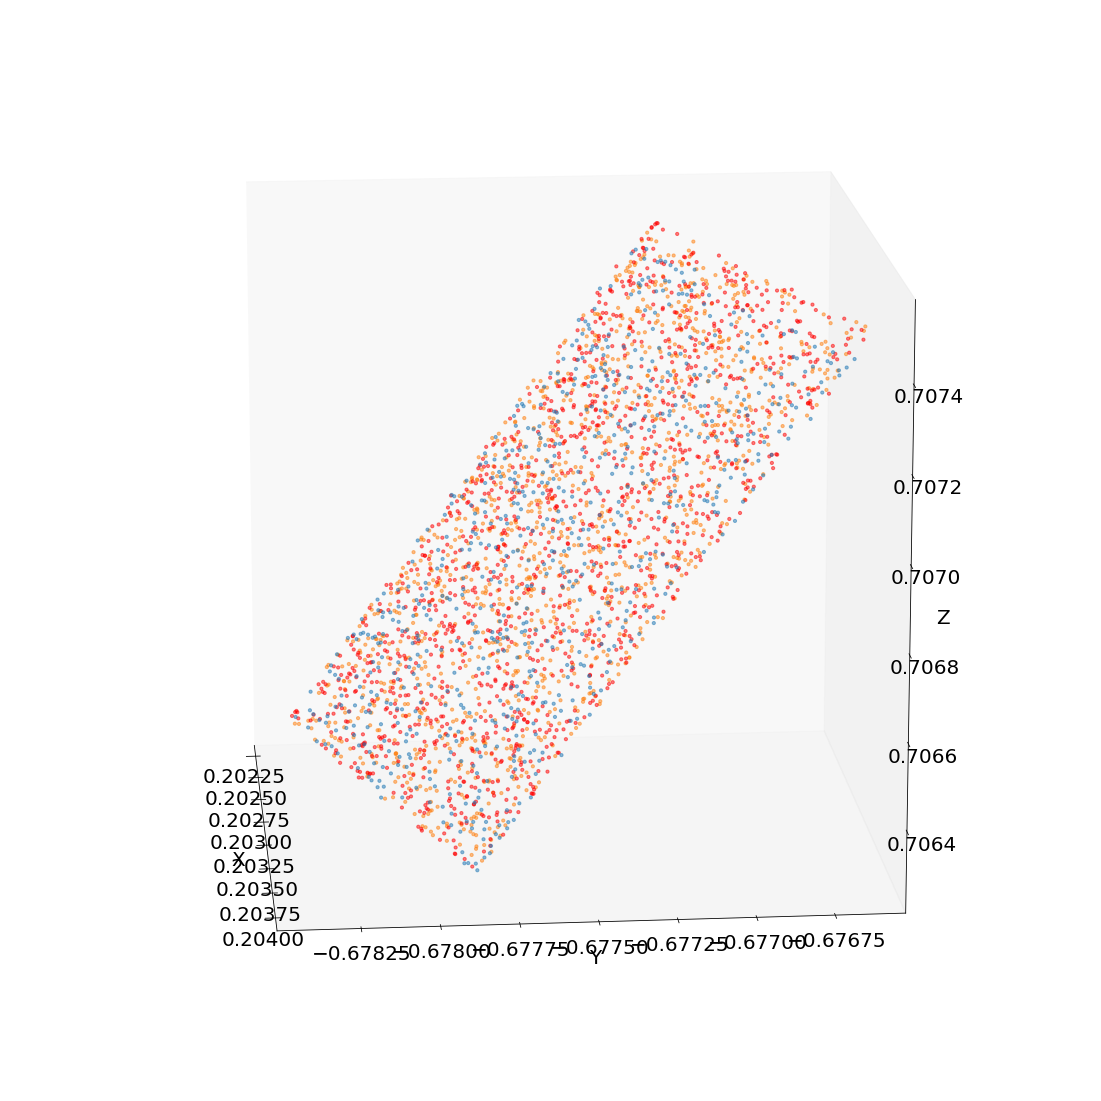

In [27]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size':20})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x2, y2, z2, s=10, alpha = 0.5)
ax.scatter(ranx2, rany2, ranz2, s=10, alpha = 0.5)
ax.scatter(ranx33, rany33, ranz33, s=10, alpha = 0.5, color = 'r')


ax.set_xlabel("X") 
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#ax.set_xlim([.2, .205])
#ax.set_ylim([-.678, -.68])
#ax.set_zlim([.705,.708])


ax.view_init(15, 355)

Definimos funciones para calcular la distancia entre dos puntos en el espacio euclidiano y esferico

In [28]:
def distancia(x1,y1, z1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2 + (z1[i] - z1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

def distanciasobreesfera(x1,y1, z1, r):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(r * np.arccos((2*r**2 - (x1[i] - x1[j]) ** 2 - (y1[i] - y1[j]) ** 2 - (z1[i] - z1[j]) ** 2)/(2*r**2)))
            j = j + 1
        i= i + 1
    return d

Medimos las distancias en el espacio esferico

In [29]:
r= 1 
d1 = distanciasobreesfera(x2, y2, z2, r)
r1 = distanciasobreesfera(ranx2, rany2, ranz2, r)
r2 = distanciasobreesfera(ranx33, rany33, ranz33, r)

Obtenemos el histograma y lo normalizamos

In [30]:
nb = 30

In [31]:
dd, nbd = np.histogram(d1, bins = nb)
rr, nbr = np.histogram(r1, bins = nb)
rr2, nbr2 = np.histogram(r2, bins = nb)

dd_normed = dd/np.sum(dd)
rr_normed = rr/np.sum(rr)
rr2_normed = rr2/np.sum(rr2)

Graficamos el histograma sin normalizar

<Figure size 720x720 with 0 Axes>

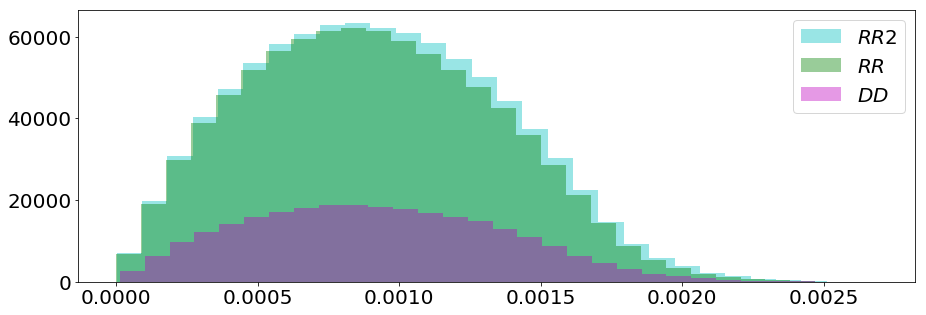

In [35]:

lmax = max(d1)
xhist = np.linspace(0, lmax, len(co))
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(r2, bins=nb, color = 'c' , alpha =0.4, label='$RR2$')
plt.hist(r1, bins=nb, color = 'g' , alpha =0.4, label='$RR$')
plt.hist(d1, bins=nb, color = 'm' , alpha =0.4, label='$DD$')
plt.legend()

Graficamos el histograma normalizado

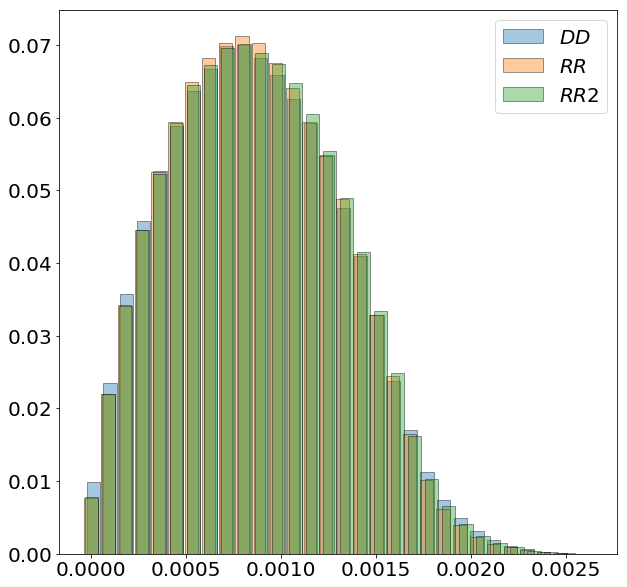

In [36]:
plt.bar(nbd[:-1], dd_normed, width=.00007, ec='k', alpha=0.4, label='$DD$')
plt.bar(nbr[:-1], rr_normed, width=.00007, ec='k', alpha=0.4, label='$RR$')
plt.bar(nbr2[:-1], rr2_normed, width=.00007, ec='k', alpha=0.4, label='$RR2$')
plt.legend()

Calculamos los estimadores

In [37]:
co = dd_normed / rr_normed - 1
co2 = rr_normed / rr2_normed - 1


Graficamos $DD/RR -1$

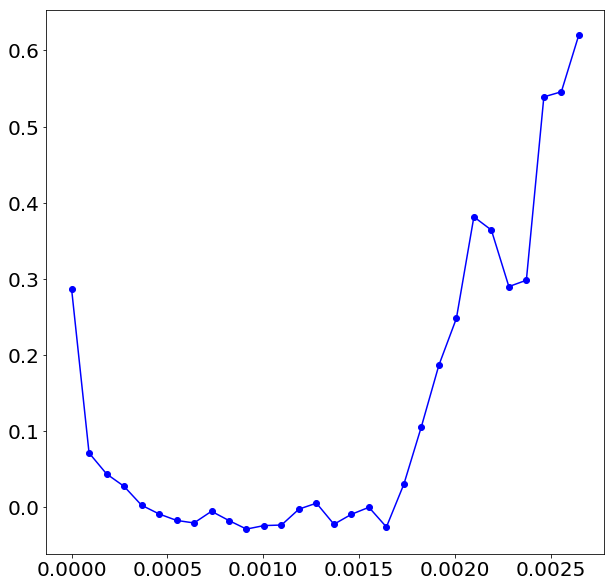

In [38]:
lmax = max(d1)
xhist = np.linspace(0, lmax, len(co))
plt.plot(xhist, co, 'bo-')

(0.0003, 0.0014)

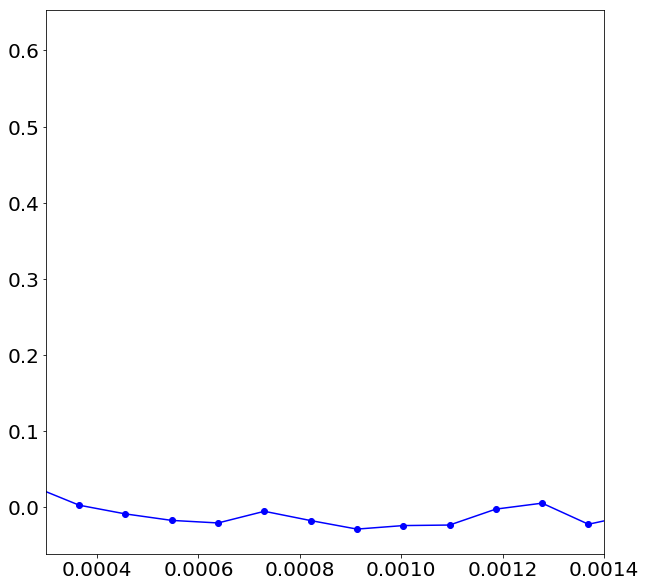

In [39]:
plt.plot(xhist, co, 'bo-')
plt.xlim(.0003, .0014)

Graficamos $RR/RR -1$

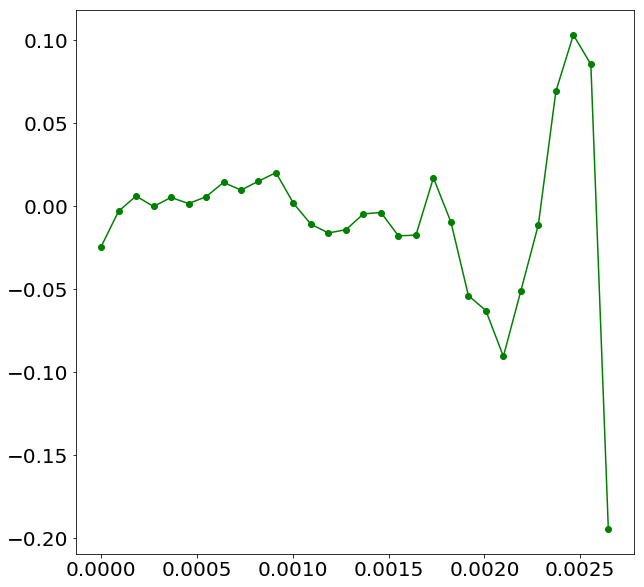

In [40]:
lmax = max(d1)
xhist2= np.linspace(0, lmax, len(co2))
plt.plot(xhist2, co2, 'bo-', c ='g')

(0.0003, 0.0013)

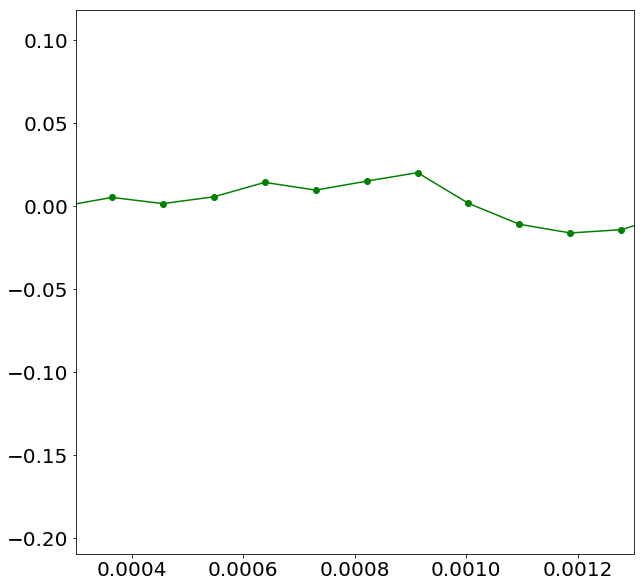

In [41]:
plt.plot(xhist2, co2, 'bo-', c ='g')
plt.xlim(.0003, .0013)

Definimos funciones para calcular la distancia entre dos puntos en el espacio euclidiano y esferico entre un conjunto de datos y otro conjunto aleatorio

In [42]:
def distanciadr(x1,y1,z1, xr, yr, zr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - xr[j]) ** 2 + (y1[i] - yr[j]) ** 2 + (z1[i] - zr[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

def distanciadresfera(x1,y1,z1, xr, yr, zr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(r * np.arccos((2*r**2 - (x1[i] - xr[j]) ** 2 - (y1[i] - yr[j]) ** 2 - (z1[i] - zr[j]) ** 2)/(2*r**2)))
            j = j + 1
        i= i + 1
    return d

Medimos la distancia entre los aleatorios y los datos $DR$ en es espacio esferico

In [43]:
len(ranx2)

1321

In [44]:
len(rany33)

1344

In [45]:
len(ranz33)

1344

In [46]:
ddr = distanciadresfera(x2, y2, z2, ranx2, rany2, ranz2) 

drrand = distanciadresfera(ranx2, rany2, ranz2, ranx33, rany33, ranz33) #CUIDAR QUE RANX2 TENGA MENOR DIMENSION QUE RANX33

Obtenemos el histograma y lo normalizamos

In [47]:
dr, nbdr = np.histogram(ddr, bins = nb)

drran, nbdrran = np.histogram(drrand, bins = nb)

In [48]:
dr_normed = dr/np.sum(dr)
drran_normed = drran/np.sum(drran)

In [49]:
len(dr)

30

Calculamos el estimador $(DD - 2DR + RR)/RR$ 

In [50]:
co3 = (dd_normed - 2*dr_normed + rr_normed)/rr_normed
co4 = (rr2_normed - 2*drran_normed + rr_normed)/rr_normed


Graficamos los histogramas

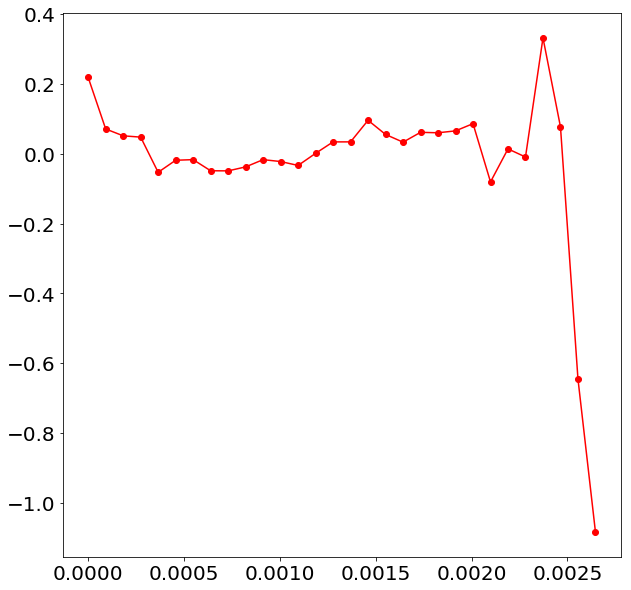

In [51]:
lmax = max(d1)
xhist = np.linspace(0, lmax, len(co))
plt.plot(xhist, co3, 'bo-', color = 'r')

(0.0001, 0.0015)

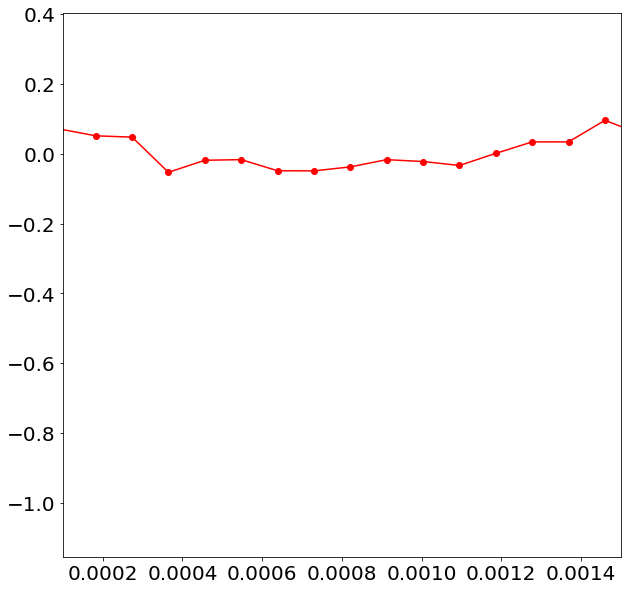

In [52]:
plt.plot(xhist, co3, 'bo-', color = 'r')
plt.xlim(.0001, .0015)

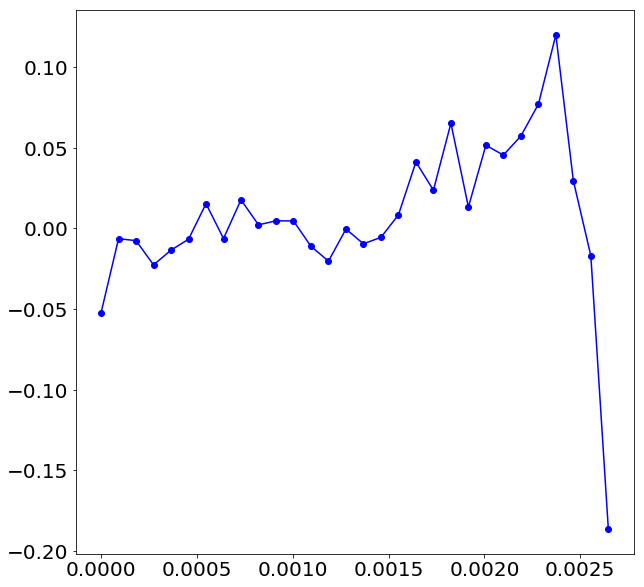

In [53]:
plt.plot(xhist, co4, 'bo-')

(0.0001, 0.001)

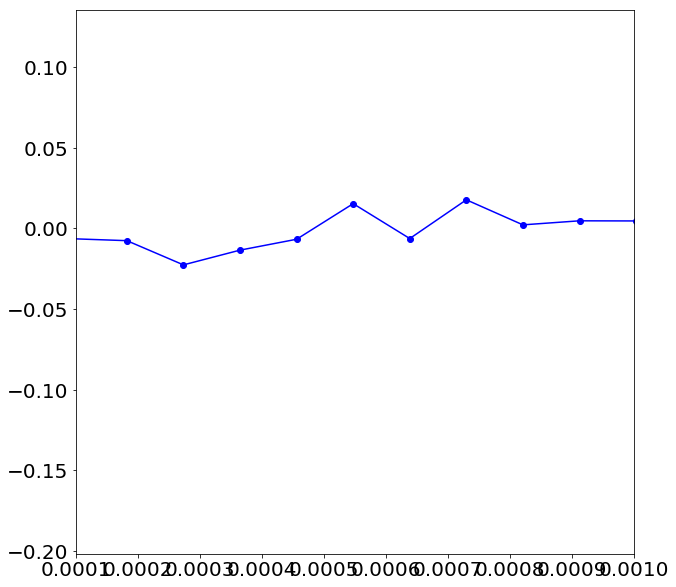

In [54]:
plt.plot(xhist, co4, 'bo-')
plt.xlim(.0001, .001)